In [1]:
import torch
import torch.nn as nn

Mean Absolute Error (MAE) - L1 Loss

In [4]:
input  = torch.randn(3,5)
target = torch.randn(3,5)

mae_loss = nn.L1Loss()
output = mae_loss(input, target)
# output.backward()
print(input)
print(target)
print(output)

tensor([[ 1.4083, -0.5297, -1.5312, -0.2423, -0.4775],
        [ 0.3862, -0.2879, -0.2333,  0.8464,  1.8486],
        [ 0.3153,  0.2495, -0.7339, -0.0361, -1.4031]])
tensor([[-0.1277,  0.4205, -1.9512,  2.3148,  0.6054],
        [-0.4226,  1.2950, -1.6718,  1.3837,  1.5256],
        [ 0.5567,  0.7559, -0.4835,  2.2668,  0.6667]])
tensor(1.1072)


Mean Squared Error (MSE)

In [5]:
mse_loss = nn.MSELoss()
output = mse_loss(input,target)
print(input)
print(target)
print(output)

tensor([[ 1.4083, -0.5297, -1.5312, -0.2423, -0.4775],
        [ 0.3862, -0.2879, -0.2333,  0.8464,  1.8486],
        [ 0.3153,  0.2495, -0.7339, -0.0361, -1.4031]])
tensor([[-0.1277,  0.4205, -1.9512,  2.3148,  0.6054],
        [-0.4226,  1.2950, -1.6718,  1.3837,  1.5256],
        [ 0.5567,  0.7559, -0.4835,  2.2668,  0.6667]])
tensor(1.7824)


During training of a model, the loss value shoud keep on decreasing for the model to keep getting better

In [13]:
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split

In [38]:
X, y = make_regression(n_samples= 500, n_features= 2, n_informative= 2, n_targets= 1, noise= 20, random_state=13)

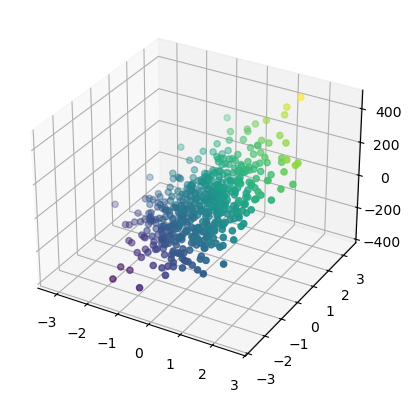

In [39]:
import matplotlib.pyplot as plt
ax = plt.axes(projection = '3d')
ax.scatter3D(X[:,0],X[:,1],y,c=y)

In [27]:
X_train , X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,random_state=13)

In [40]:
from torch.utils.data import Dataset
class Data(Dataset):
    def __init__(self, X, y):
        self.X = torch.FloatTensor(X)
        self.y = torch.FloatTensor(y)
        self.len = self.X.shape[0]
    
    def __getitem__(self, index):
        return self.X[index], self.y[index]
    
    def __len__(self):
        return self.len

In [46]:
traindata = Data(X_train,y_train)
testdata = Data(X_test,y_test)

In [ ]:
class LinearReg:
    def __init__(self):
        self.weights = None
        self.bias = None
    
    def fit(self,X_train, y_train, epochs = 100, lr = 0.01 ):
        